In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("AMZN.csv")
df = df.iloc[::-1]
del df['Unnamed: 0']
df

,volume,open,close,high,low,date
1251,72171480.0,50.0325,50.3255,50.4275,49.9050,2017-07-12 04:00:00
1250,57615380.0,50.2310,50.0315,50.3440,49.7950,2017-07-13 04:00:00
1249,42049380.0,50.1200,50.0905,50.2225,49.8445,2017-07-14 04:00:00
1248,74251740.0,50.2345,50.5020,50.7375,50.1905,2017-07-17 04:00:00
1247,80152480.0,50.3000,51.2225,51.3015,50.2000,2017-07-18 04:00:00
...,...,...,...,...,...,...
4,69867618.0,112.3800,116.4600,116.7100,111.4300,2022-06-24 04:00:00
3,62118440.0,117.0900,113.2200,117.9800,112.7000,2022-06-27 04:00:00
2,75166660.0,113.5000,107.4000,114.8500,107.0400,2022-06-28 04:00:00
1,66361851.0,107.3800,108.9200,110.9900,106.9100,2022-06-29 04:00:00


In [3]:
df.describe()

,volume,open,close,high,low
count,1.252000e+03,1252.000000,1252.000000,1252.000000,1252.000000
mean,8.664763e+07,114.131881,114.056958,115.422515,112.674051
std,4.126215e+07,40.607143,40.533557,41.094822,40.051690
min,1.762674e+07,47.000000,46.930000,47.431500,46.587500
25%,5.875841e+07,84.146250,84.419750,85.212125,83.306250
50%,7.504312e+07,96.843250,97.028750,97.832750,95.675000
75%,1.023342e+08,158.380625,158.109000,160.017000,156.271125
max,3.307574e+08,187.200000,186.570500,188.653900,184.839600


In [4]:
google_stock = df['close'].values.astype('float32')
google_stock = google_stock.reshape(len(google_stock), 1)
google_stock

array([[ 50.3255],
       [ 50.0315],
       [ 50.0905],
       ...,
       [107.4   ],
       [108.92  ],
       [106.21  ]], dtype=float32)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
google_stock_n = scaler.fit_transform(google_stock)
google_stock_n

array([[0.02431601],
       [0.02221063],
       [0.02263314],
       ...,
       [0.43304056],
       [0.44392562],
       [0.42451864]], dtype=float32)

In [6]:
def train_test_split(stock):
  train_size = int(len(stock) * 0.8)
  test_size = len(stock) - train_size
  train, test = stock[0:train_size,:], stock[train_size:len(stock),:]
  return train, test

In [7]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
def create_trainTest():
	train, test = train_test_split(google_stock_n)
	# reshape into X=t and Y=t+1
	look_back = 1
	trainX, trainY = create_dataset(train, look_back)
	testX, testY = create_dataset(test, look_back)
	trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
	testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
	return trainX, testX, trainY, testY
trainX, testX, trainY, testY = create_trainTest()


Epoch 1/100


2022-07-25 11:17:39.887789: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 2s 2ms/step - loss: 0.2144
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1602
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0414
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 13/100
32/32 [=============================

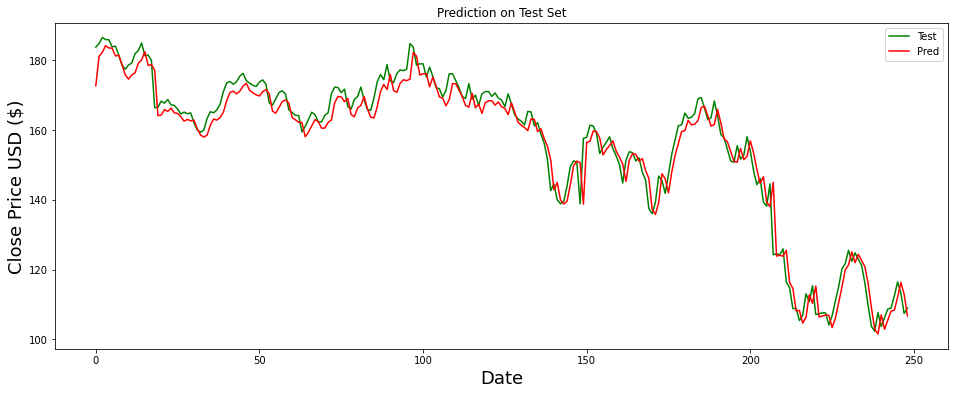

In [8]:
def first_train():
  np.random.seed(1234)
  tf.random.set_seed(1234)
  trainX, testX, trainY, testY = create_trainTest()
  model = Sequential()
  model.add(LSTM(units=40,return_sequences=True,input_shape=(trainX.shape[1], 1), activation = 'relu'))
  model.add(LSTM(units=30,return_sequences=True, activation = 'relu'))
  model.add(LSTM(units=30, activation = 'relu'))
  model.add(Dense(units=1))
  model.compile(optimizer='adam',loss='mean_squared_error')
  model.fit(trainX, trainY,epochs=100,batch_size=32)
  model.save('test1.h5')


def evaluate_model():
  trainX, testX, trainY, testY = create_trainTest()

  model = tf.keras.models.load_model('test1.h5')
  model.summary()

  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)
  # invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  testPredict = scaler.inverse_transform(testPredict)

  #invert train and test Y
  trainY = scaler.inverse_transform([trainY])
  testY = scaler.inverse_transform([testY])

  
  print('Train Mean Absolute Error:', mean_absolute_error(trainY[0], trainPredict[:, 0]))
  print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])))
  print('Test Mean Absolute Error:', mean_absolute_error(testY[0], testPredict[:, 0]))
  print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(testY[0], testPredict[:, 0])))

  plt.figure(figsize=(16,6))
  plt.title('Prediction on Test Set')
  plt.xlabel('Date', fontsize = 18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(testY[0], color = 'green')
  plt.plot(testPredict, color = 'red')
  plt.legend(['Test', 'Pred'])
  plt.savefig('djtme_train_test.png', dpi = 300, bbox_inches = 'tight')
  plt.show()
  
  return model

first_train()
evaluate_model()

To evaluate whether our architecture may overfit the data or not, we do the regular train/test split and evaluate the results on both the training set and test set. That is, our results indicate that the model only overfit slightly, but it also fit the test set well(captures all the movement with some slight errors). We are more confident on using the same architecture for predicting the future

P/S: we have made a lot of improvements, overfitting problem before was very severe.